# A Taste of Data Science [Python]

author: Brandeis Marshall

date: April 5, 2019

## Motivation: Baby's Name & Ethnicity

Given a newborn's name, could their race or ethnicity be predicted?

*Note: This inquiry is more complex than what is provided in this Jupyter Notebook. 
Consider the content presented below as a starter kit.*

## Lane 1: Data Acquisition & Cleanup

In [1]:
import numpy as np #  N-dimensional array scientific computing library 
import matplotlib.pyplot as plt # Python 2D plotting library
import pandas as pd # Python high-performance data structures & data analysis library
import seaborn #Python data visualization library based on matplotlib

In [2]:
# allows the output of plotting commands to be displayed inline, e.g., 
# below the code cell that produced it
%matplotlib inline 

In [4]:
# pre-selected csv file from data.gov
# import csv file into a pandas dataframe 'names'
#names = pd.read_csv('Popular_Baby_Names_name_sex.csv')

# if a public dataset, you can load the file directly from the web address
names = pd.read_csv("https://data.cityofnewyork.us/api/views/25th-nujf/rows.csv?accessType=DOWNLOAD")

# preview the dataframe 'names' content
names.head(10)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Olivia,172,1
1,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Chloe,112,2
2,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Sophia,104,3
3,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Emily,99,4
4,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Emma,99,4
5,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Mia,79,5
6,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Charlotte,59,6
7,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Sarah,57,7
8,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Hannah,56,8
9,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Isabella,56,8


In [5]:
names = names.rename(index=str, columns={"Child's First Name": "Name"})
names.head(10)

,Year of Birth,Gender,Ethnicity,Name,Count,Rank
0,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Olivia,172,1
1,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Chloe,112,2
2,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Sophia,104,3
3,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Emily,99,4
4,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Emma,99,4
5,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Mia,79,5
6,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Charlotte,59,6
7,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Sarah,57,7
8,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Hannah,56,8
9,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Isabella,56,8


In [6]:
# datatypes assigned to each column must be appropriately categorized
names.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11345 entries, 0 to 11344
Data columns (total 6 columns):
Year of Birth    11345 non-null int64
Gender           11345 non-null object
Ethnicity        11345 non-null object
Name             11345 non-null object
Count            11345 non-null int64
Rank             11345 non-null int64
dtypes: int64(3), object(3)
memory usage: 620.4+ KB


In [7]:
# For the numeric columns, view basic descriptive statistics
names.describe()

,Year of Birth,Count,Rank
count,11345.000000,11345.000000,11345.000000
mean,2013.552578,32.836844,57.656765
std,1.746367,36.981866,25.186882
min,2011.000000,10.000000,1.000000
25%,2012.000000,13.000000,38.000000
50%,2014.000000,20.000000,59.000000
75%,2015.000000,35.000000,79.000000
max,2016.000000,387.000000,102.000000


## Lane 2: Data Storage & Management

In [8]:
# more data wrangling: consistency formatting for ethnicities
names = names.replace("BLACK NON HISP", "BLACK NON HISPANIC")
names = names.replace("ASIAN AND PACI", "ASIAN AND PACIFIC ISLANDER")
names = names.replace("WHITE NON HISP", "WHITE NON HISPANIC")

In [9]:
# Since baby name and race are our primary focus, let's index accordingly. 
# We separate names by gender
names_idx = names.set_index(['Gender',"Name",'Year of Birth']).sort_index()

# display first 20 results
names_idx.head(20)

Ethnicity  Count  Rank
Gender Name     Year of Birth                                         
FEMALE AALIYAH  2011                   BLACK NON HISPANIC     69     5
                2011                             HISPANIC     63    30
                2012                   BLACK NON HISPANIC     55    10
                2012                             HISPANIC     68    26
       ABBY     2011                             HISPANIC     10    78
                2012           ASIAN AND PACIFIC ISLANDER     11    44
       ABIGAIL  2011           ASIAN AND PACIFIC ISLANDER     24    24
                2011                   BLACK NON HISPANIC     51    11
                2011                             HISPANIC     80    21
                2011                   WHITE NON HISPANIC    103    19
                2012           ASIAN AND PACIFIC ISLANDER     29    26
                2012                   BLACK NON HISPANIC     66     5
                2012                             HISPANIC     99    15
       ADA      2011           ASIAN AND PACIFIC ISLANDER     13    35
                2012           ASIAN AND PACIFIC ISLANDER     12    43
                2012                   WHITE NON HISPANIC     14    79
       ADDISON  2011                   BLACK NON HISPANIC     13    42
                2011                   WHITE NON HISPANIC     19    72
                2012                   WHITE NON HISPANIC     32    61
       ADELAIDE 2012                   WHITE NON HISPANIC     19    74

In [10]:
# organize data by race
# Although this dataset doesn't have an null entries, it's good practice to execute the dropna method just in case.
asian = names_idx.where(names_idx.Ethnicity == "ASIAN AND PACIFIC ISLANDER").dropna()
black = names_idx.where(names_idx.Ethnicity == "BLACK NON HISPANIC").dropna()
hispanic = names_idx.where(names_idx.Ethnicity == "HISPANIC").dropna()
white = names_idx.where(names_idx.Ethnicity == "WHITE NON HISPANIC").dropna()

In [11]:
# preview an ethnic category
asian.head()

Ethnicity  Count  Rank
Gender Name    Year of Birth                                         
FEMALE ABBY    2012           ASIAN AND PACIFIC ISLANDER   11.0  44.0
       ABIGAIL 2011           ASIAN AND PACIFIC ISLANDER   24.0  24.0
               2012           ASIAN AND PACIFIC ISLANDER   29.0  26.0
       ADA     2011           ASIAN AND PACIFIC ISLANDER   13.0  35.0
               2012           ASIAN AND PACIFIC ISLANDER   12.0  43.0

In [12]:
# consider the tally for each ethnicity
print(len(asian))
print(len(black))
print(len(hispanic))
print(len(white))

1997
2032
3314
4002


In [13]:
# check: sum of the tally is the same as number of instances upon dataframe loading
print(len(asian)+len(black)+len(hispanic)+len(white))

11345


# Lane 3: Data Analysis
Exploratory Data Analysis, where we are dissecting data *responsibily*

## Preliminary Dataset Assessment

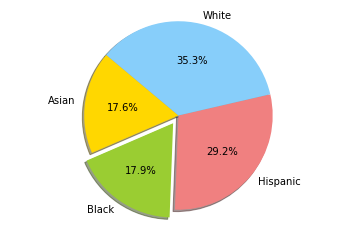

In [14]:
# understanding ethnicity representation
labels = 'Asian', 'Black', 'Hispanic', 'White'
sizes = [len(asian), len(black), len(hispanic), len(white)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.0, 0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [15]:
# male/female plot
# organize data by gender
# Although this dataset doesn't have an null entries, it's good practice to execute the dropna method just in case.
babygirls = names.where(names.Gender == "FEMALE").dropna()
babyboys = names.where(names.Gender == "MALE").dropna()

babygirls.head()


,Year of Birth,Gender,Ethnicity,Name,Count,Rank
0,2016.0,FEMALE,ASIAN AND PACIFIC ISLANDER,Olivia,172.0,1.0
1,2016.0,FEMALE,ASIAN AND PACIFIC ISLANDER,Chloe,112.0,2.0
2,2016.0,FEMALE,ASIAN AND PACIFIC ISLANDER,Sophia,104.0,3.0
3,2016.0,FEMALE,ASIAN AND PACIFIC ISLANDER,Emily,99.0,4.0
4,2016.0,FEMALE,ASIAN AND PACIFIC ISLANDER,Emma,99.0,4.0


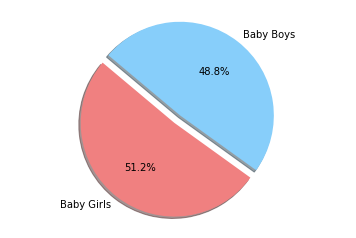

In [16]:
# understanding gender representation in dataset
labels = 'Baby Girls', 'Baby Boys'
sizes = [len(babygirls), len(babyboys)]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

## Popular Baby Names (Overall)

In [17]:
# sort by popular names
pop_names = names.sort_values(by=['Count'], ascending=False)
pop_names.head(10)

,Year of Birth,Gender,Ethnicity,Name,Count,Rank
1413,2016,MALE,HISPANIC,Liam,387,1
3477,2015,MALE,HISPANIC,Liam,356,1
1414,2016,MALE,HISPANIC,Jacob,351,2
3478,2015,MALE,HISPANIC,Dylan,339,2
3479,2015,MALE,HISPANIC,Ethan,332,3
9743,2011,FEMALE,HISPANIC,ISABELLA,331,1
1415,2016,MALE,HISPANIC,Dylan,312,3
5302,2014,MALE,HISPANIC,Liam,312,1
10749,2011,MALE,HISPANIC,JUSTIN,310,2
3480,2015,MALE,HISPANIC,Matthew,308,4


In [18]:
# sum occurs for other columns -- Year of Birth and Rank
# pop_names.head(10).groupby(['Name']).sum()

# Observation 1: Different years appear.
# Observation 2: Both genders appear.
# Observation 3: Only ethnicity displayed is Hispanic. 
# Observation 4: Several names are presented in multiple results, e.g., Liam and Dylan
# Let's group the output based on name and tally the counts 
pn_10 = pop_names[['Name', 'Count']].head(10)
pn_10 = pn_10.groupby(['Name'])['Count'].sum()
pn_10

Name
Dylan        651
Ethan        332
ISABELLA     331
JUSTIN       310
Jacob        351
Liam        1055
Matthew      308
Name: Count, dtype: int64

In [20]:
# bar chart plot -- minimal value-add
#pn_10.plot.bar()

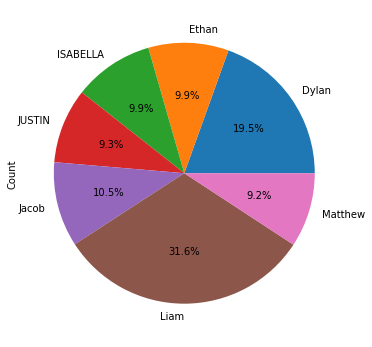

In [19]:
# pie chart plot -- indicating popular name's impact in relation to other popular names
pn_10.plot.pie(figsize=(6,6), autopct='%1.1f%%')

## Popular Girls' Names (Overall)

In [20]:
# sort by popular girl names, all ethnicity, all years
pop_girls = babygirls.sort_values(by=['Count'], ascending=False)
pop_girls.head(10)

,Year of Birth,Gender,Ethnicity,Name,Count,Rank
9743,2011.0,FEMALE,HISPANIC,ISABELLA,331.0,1.0
2433,2015.0,FEMALE,HISPANIC,Isabella,307.0,1.0
356,2016.0,FEMALE,HISPANIC,Isabella,276.0,1.0
2434,2015.0,FEMALE,HISPANIC,Sophia,269.0,2.0
357,2016.0,FEMALE,HISPANIC,Sophia,261.0,2.0
2435,2015.0,FEMALE,HISPANIC,Mia,257.0,3.0
6385,2013.0,FEMALE,WHITE NON HISPANIC,Olivia,233.0,1.0
4667,2014.0,FEMALE,WHITE NON HISPANIC,Esther,233.0,2.0
661,2016.0,FEMALE,WHITE NON HISPANIC,Olivia,230.0,1.0
9744,2011.0,FEMALE,HISPANIC,MIA,229.0,2.0


In [21]:
# Observation 1: Different years appear.
# Observation 2: Two of the 4 ethnicities are displayed. 
# Observation 3: Several names are presented in multiple results, e.g., Isabella, Mia, Sophia

# Note: capitalization inconsistencies, which could have been resolved in
# Storage and Management (Lane 2) during data wrangling. 
pop_girls['Name'] = pop_girls['Name'].str.upper() 

# Let's group the output based on name and tally the counts 
pn_girls_10 = pop_girls[['Name', 'Count']].head(10)
pn_girls_10 = pn_girls_10.groupby(['Name'])['Count'].sum()
pn_girls_10

Name
ESTHER      233.0
ISABELLA    914.0
MIA         486.0
OLIVIA      463.0
SOPHIA      530.0
Name: Count, dtype: float64

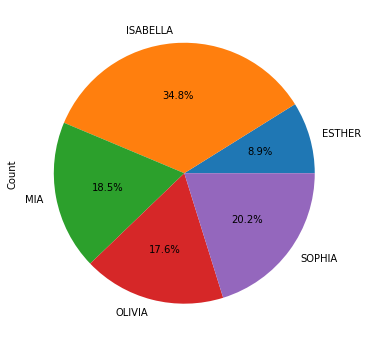

In [22]:
# pie chart plot -- indicating popular name's impact in relation to other popular names
pn_girls_10.plot.pie(figsize=(6,6), autopct='%1.1f%%')

## Popular Boys' Names (Overall)

In [23]:
# sort by popular boy names, all ethnicity, all years
pop_boys = babyboys.sort_values(by=['Count'], ascending=False)
pop_boys.head(10)

,Year of Birth,Gender,Ethnicity,Name,Count,Rank
1413,2016.0,MALE,HISPANIC,Liam,387.0,1.0
3477,2015.0,MALE,HISPANIC,Liam,356.0,1.0
1414,2016.0,MALE,HISPANIC,Jacob,351.0,2.0
3478,2015.0,MALE,HISPANIC,Dylan,339.0,2.0
3479,2015.0,MALE,HISPANIC,Ethan,332.0,3.0
1415,2016.0,MALE,HISPANIC,Dylan,312.0,3.0
5302,2014.0,MALE,HISPANIC,Liam,312.0,1.0
10749,2011.0,MALE,HISPANIC,JUSTIN,310.0,2.0
3480,2015.0,MALE,HISPANIC,Matthew,308.0,4.0
7254,2013.0,MALE,WHITE NON HISPANIC,David,304.0,1.0


In [24]:
# Observation 1: Different years appear.
# Observation 2: Two of the 4 ethnicities are displayed. 
# Observation 3: Several names are presented in multiple results, e.g., Liam, Dylan

# Note: capitalization inconsistencies, which could have been resolved in
# Storage and Management (Lane 2) during data wrangling. 
pop_boys['Name'] = pop_boys['Name'].str.upper() 

# Let's group the output based on name and tally the counts 
pn_boys_10 = pop_boys[['Name', 'Count']].head(10)
pn_boys_10 = pn_boys_10.groupby(['Name'])['Count'].sum()
pn_boys_10

Name
DAVID       304.0
DYLAN       651.0
ETHAN       332.0
JACOB       351.0
JUSTIN      310.0
LIAM       1055.0
MATTHEW     308.0
Name: Count, dtype: float64

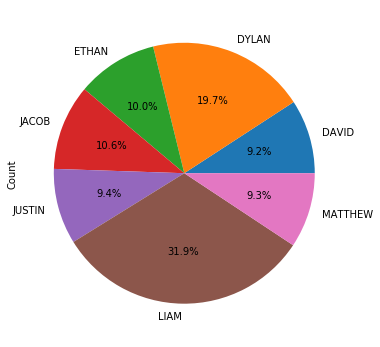

In [26]:
# pie chart plot -- indicating popular name's impact in relation to other popular names
pn_boys_10.plot.pie(figsize=(6,6), autopct='%1.1f%%')

## Popular Girls' Name by Ethnicity

In [28]:
# sort by popular girl names, by ethnicity, all years
# Asian
babygirls_asian = babygirls.where(babygirls.Ethnicity == "ASIAN AND PACIFIC ISLANDER").dropna()

# Make all names uppercase
babygirls_asian['Name'] = babygirls_asian['Name'].str.upper()

# sort by popular Asian girl names all years
pop_girls_asian = babygirls_asian.sort_values(by=['Count'], ascending=False)

# display, in case 
#print(pop_girls_asian.head(10))

# Let's group the output based on name and tally the counts 
pn_asian_girls_10 = pop_girls_asian[['Name', 'Count']].head(10)
pn_asian_girls_10 = pn_asian_girls_10.groupby(['Name'])['Count'].sum()
print(pn_asian_girls_10)


# Black
babygirls_black = babygirls.where(babygirls.Ethnicity == "BLACK NON HISPANIC").dropna()
babygirls_black['Name'] = babygirls_black['Name'].str.upper()
pop_girls_black = babygirls_black.sort_values(by=['Count'], ascending=False)
#print(pop_girls_black.head(10))

pn_black_girls_10 = pop_girls_black[['Name', 'Count']].head(10)
pn_black_girls_10 = pn_black_girls_10.groupby(['Name'])['Count'].sum()
print(pn_black_girls_10)

# Hispanic 
babygirls_hispanic = babygirls.where(babygirls.Ethnicity == "HISPANIC").dropna()
babygirls_hispanic['Name'] = babygirls_hispanic['Name'].str.upper()
pop_girls_hispanic = babygirls_hispanic.sort_values(by=['Count'], ascending=False)
#print(pop_girls_hispanic.head(10))

pn_hispanic_girls_10 = pop_girls_hispanic[['Name', 'Count']].head(10)
pn_hispanic_girls_10 = pn_hispanic_girls_10.groupby(['Name'])['Count'].sum()
print(pn_hispanic_girls_10)

# White 
babygirls_white = babygirls.where(babygirls.Ethnicity == "WHITE NON HISPANIC").dropna()
babygirls_white['Name'] = babygirls_white['Name'].str.upper()
pop_girls_white = babygirls_white.sort_values(by=['Count'], ascending=False)
#print(pop_girls_white.head(10))

pn_white_girls_10 = pop_girls_white[['Name', 'Count']].head(10)
pn_white_girls_10 = pn_white_girls_10.groupby(['Name'])['Count'].sum()
print(pn_white_girls_10)


Name
CHLOE     509.0
EMILY     110.0
OLIVIA    492.0
SOPHIA    263.0
Name: Count, dtype: float64
Name
AVA        274.0
KAYLA       78.0
LONDON      92.0
MADISON    408.0
OLIVIA      82.0
SKYLAR      91.0
Name: Count, dtype: float64
Name
ISABELLA    914.0
MIA         921.0
SOPHIA      753.0
Name: Count, dtype: float64
Name
EMMA      453.0
ESTHER    457.0
LEAH      220.0
OLIVIA    688.0
RACHEL    449.0
Name: Count, dtype: float64


<Figure size 432x288 with 0 Axes>

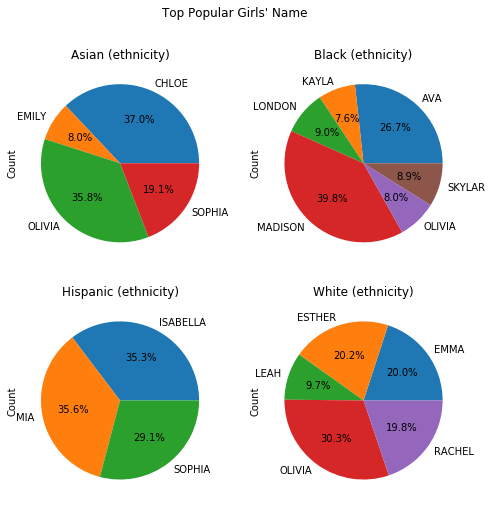

In [28]:
fig = plt.figure()

plt.figure(figsize=(8,8))
# plot chart
ax1 = plt.subplot(221, aspect='equal')
ax1.set_title("Asian (ethnicity)")
pn_asian_girls_10.plot.pie(figsize=(8,8), ax=ax1, autopct='%1.1f%%')

ax2 = plt.subplot(222, aspect='equal')
ax2.set_title("Black (ethnicity)")
pn_black_girls_10.plot.pie(figsize=(8,8), ax=ax2, autopct='%1.1f%%')

ax3 = plt.subplot(223, aspect='equal')
ax3.set_title("Hispanic (ethnicity)")
pn_hispanic_girls_10.plot.pie(figsize=(8,8), ax=ax3, autopct='%1.1f%%')

ax4 = plt.subplot(224, aspect='equal')
ax4.set_title("White (ethnicity)")
pn_white_girls_10.plot.pie(figsize=(8,8), ax=ax4, autopct='%1.1f%%')

plt.suptitle("Top Popular Girls' Name")
plt.show()

In [ ]:
# you could determine the top popular boy names by ethnicity here...
# a comparative analysis (of girls only, boys only, or both) could be done here...
# other options

# Lane 4: Data Visualization
Displays outcomes/findings in an accessible manner

*Note: Below, we share one approach. Be aware that there are static and interactive options* 

## Top-10 girls names by year 

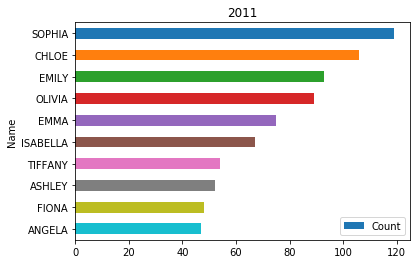

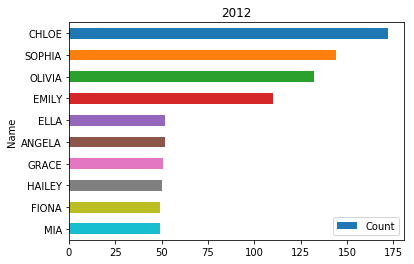

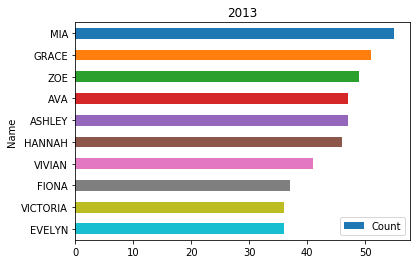

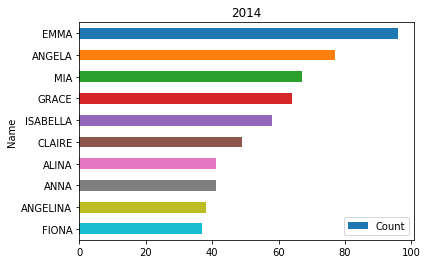

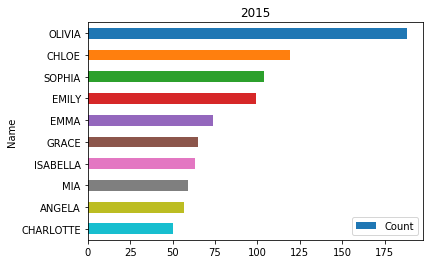

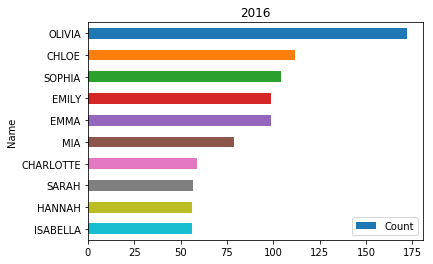

In [30]:
# Make all names uppercase
babygirls['Name'] = babygirls['Name'].str.upper()
babygirls_top10_byyear = pd.DataFrame(columns =['Year of Birth', 'Name', 'Count'])

years = 2011, 2012, 2013, 2014, 2015, 2016

# iterate through each year to isolate the top names and display their frequency counts
for i in years:
    data = babygirls.where(babygirls['Year of Birth'] == i).dropna().head(10)
    data.Count=pd.to_numeric(data.Count)
    df = data[['Name','Count']]
    babygirls_top10_byyear = babygirls_top10_byyear.append(data[['Year of Birth','Name','Count']])
    df.plot.barh(x='Name',y='Count', title=i)
    plt.gca().invert_yaxis()

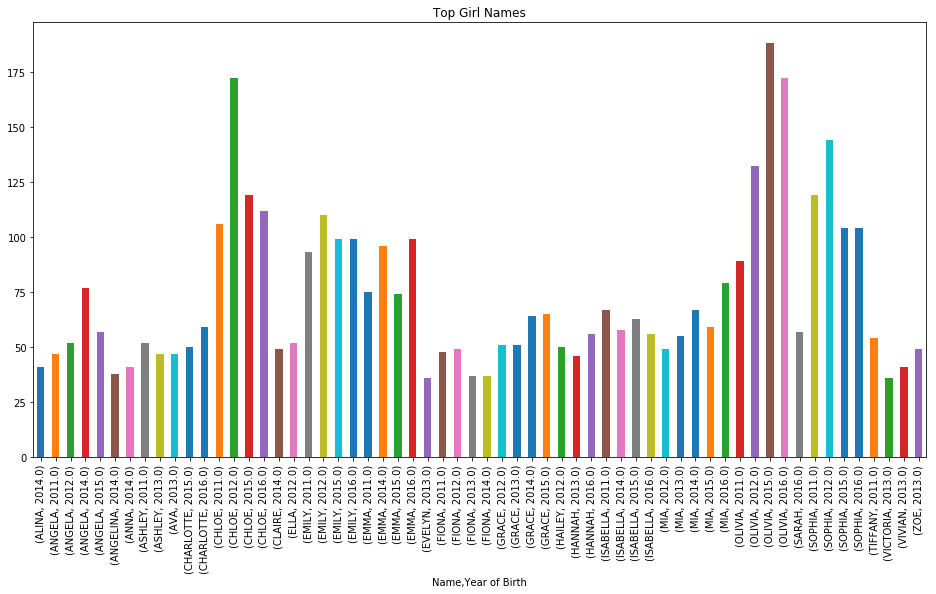

In [32]:
# Observation 1: some names appeared in multiple years

# alphabetizes, groups and orders names with their frequency counts
bg_10 = babygirls_top10_byyear.groupby(['Name', 'Year of Birth'])['Count'].sum()
bg_10.plot.bar(x='Name',y='Count', title="Top Girl Names", figsize=(16,8), stacked=True)

In [29]:
# depending on which analyses where performed, other visualizations could be shown

# Lane 5: Data Storytelling
The narrative that contextualizes the outcomes and findings

In [31]:
# Share a summary of your findings
# Share your interpretations
# Discuss your conclusions, open challenges and so forth
# Consider this your executive summary

# How do you plan to disseminate your outcomes to both external and internal stakeholders?

# Thank you!